## Train / Test Split
Um die trainierten Models zu überprüfen, werden wir das Datenset in Train/Test Sets aufteilen.


<class 'pandas.core.frame.DataFrame'>
Int64Index: 929 entries, 5 to 3726
Columns: 231 entries, id to rebuild_building_shell_types
dtypes: bool(2), float64(124), int64(20), object(85)
memory usage: 1.6+ MB
None


<AxesSubplot:>

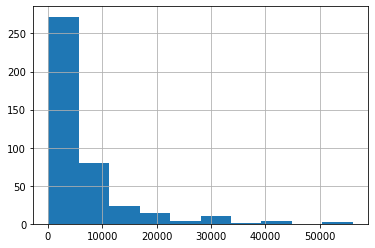

In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd

import src.package.shared as sh
import src.package.consts as c
import src.package.charts as charts
import src.package.importer as im

pd.set_option('display.max_rows', 500)

df = im.get_dataset('../package/datasets/full_dataset.csv')
print(df.info())
df = df.dropna(subset=[c.FIELD_USAGE_CLUSTER, c.FIELD_AREA_TOTAL_FLOOR_416, c.FIELD_AREA_MAIN_USAGE])

df[c.FIELD_AREA_TOTAL_FLOOR_416].hist()

#### GF for Stratify

In [2]:
# create distribution classes for GF
distribution_bins = 10
labels = list(range(0, distribution_bins))
df['gf_cat'] = pd.qcut(df[c.FIELD_AREA_TOTAL_FLOOR_416], distribution_bins, labels=labels)
df['gf_cat'].value_counts()


0    42
2    41
3    41
4    41
5    41
6    41
7    41
8    41
9    41
1    40
Name: gf_cat, dtype: int64

#### Train & Test Set
Save train & test set to CSV

In [3]:
# stratify=df[[c.FIELD_USAGE_CLUSTER, 'gf_cat']] multiple stratify columns?
train_set, test_set = train_test_split(df, test_size=0.2, random_state=5, stratify=df['gf_cat'])

# remove field gf_cat
train_set = train_set.drop(columns=['gf_cat'])
test_set = test_set.drop(columns=['gf_cat'])

# save train set
file_path_train = sh.export_directory_path('train_set.csv')
# train_set.to_csv(file_path_train, index=False, sep=';')

# save test set
file_path_test = sh.export_directory_path('test_set.csv')
# test_set.to_csv(file_path_test, index=False, sep=';')

#### Analyse Train-Set

count      328.000000
mean      5932.024390
std       7667.374731
min        104.000000
25%       1316.250000
50%       3008.500000
75%       7159.750000
max      51100.000000
Name: area_total_floor_416, dtype: float64
WOHNEN           0.289634
SCHULEN          0.262195
BUERO            0.094512
HALLEN           0.094512
BETRIEB          0.079268
BEHERBERGUNG     0.067073
GESUNDHEIT       0.033537
KULTUS_KULTUR    0.027439
ANDERES          0.024390
TECHNIK          0.009146
OFFENE_BAUTEN    0.009146
IRRELEVANT       0.006098
AUSSENANLAGEN    0.003049
Name: usage_cluster, dtype: float64
13


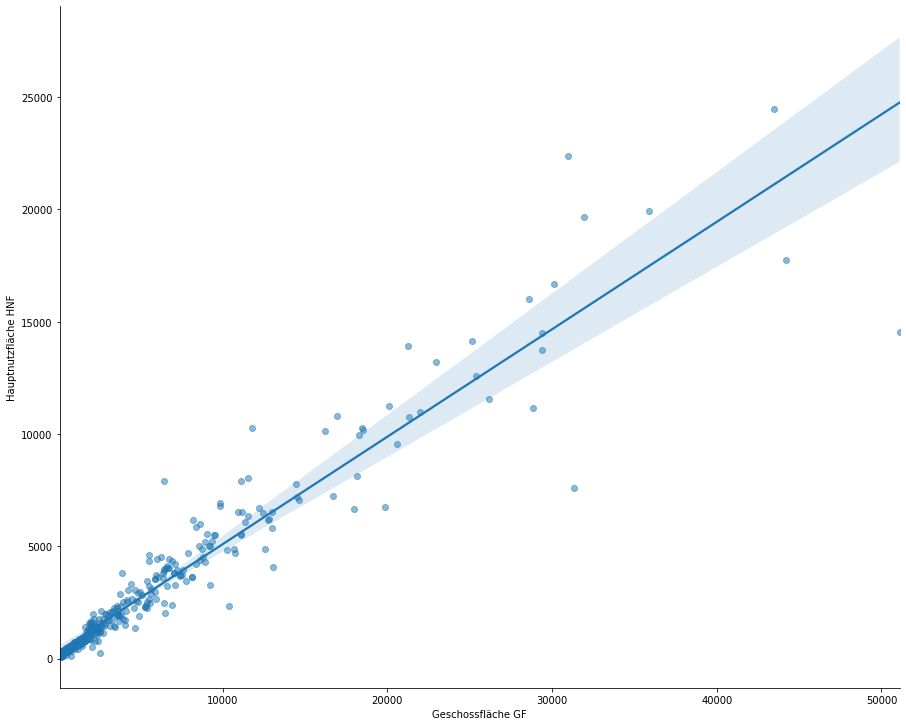

In [4]:
print(train_set[c.FIELD_AREA_TOTAL_FLOOR_416].describe())
print(train_set[c.FIELD_USAGE_CLUSTER].value_counts(normalize=True))
print(len(train_set[c.FIELD_USAGE_CLUSTER].unique()))
charts.lmplot_gf_hnf(train_set)

#### Analyse Test-Set

count       82.000000
mean      6631.073171
std      10014.409720
min        176.000000
25%       1226.500000
50%       2979.000000
75%       6868.750000
max      56112.000000
Name: area_total_floor_416, dtype: float64
WOHNEN           0.329268
SCHULEN          0.243902
HALLEN           0.134146
BUERO            0.097561
BEHERBERGUNG     0.085366
BETRIEB          0.060976
KULTUS_KULTUR    0.024390
ANDERES          0.024390
Name: usage_cluster, dtype: float64


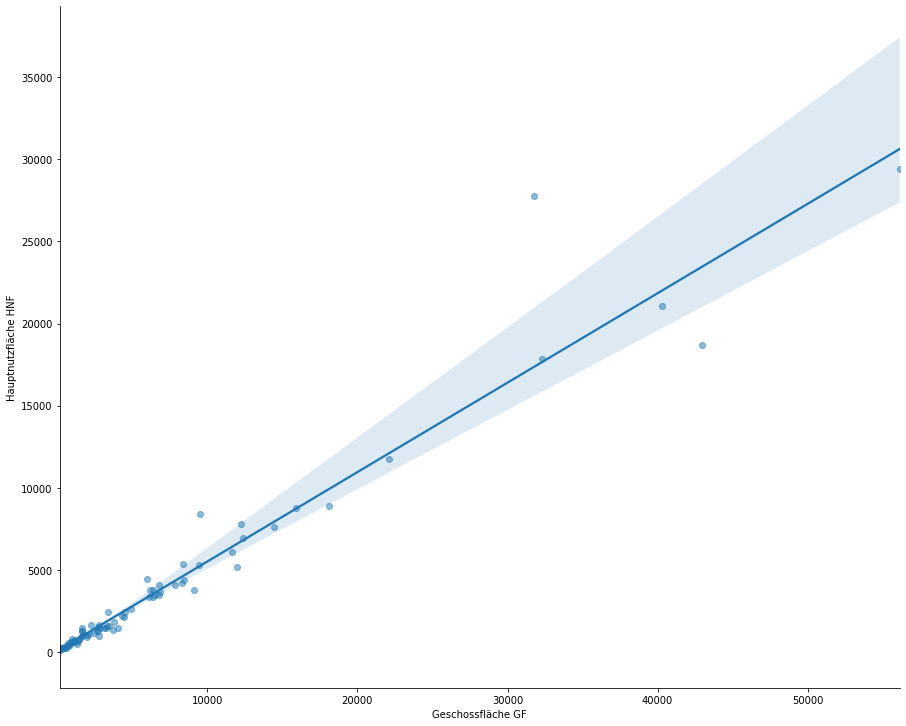

In [5]:
print(test_set[c.FIELD_AREA_TOTAL_FLOOR_416].describe())
print(test_set[c.FIELD_USAGE_CLUSTER].value_counts(normalize=True))
charts.lmplot_gf_hnf(test_set)